In [13]:
import pandas as pd

# Load Liar dataset
liar_cols = ["id", "label", "statement"]
liar_path_test = "test.tsv"
liar_df_test = pd.read_csv(liar_path_test, sep='\t', header=None, usecols=[0, 1, 2], names=liar_cols)
liar_path_train = "train.tsv"
liar_df_train = pd.read_csv(liar_path_train, sep='\t', header=None, usecols=[0, 1, 2], names=liar_cols)
liar_path_valid = "valid.tsv"
liar_df_valid = pd.read_csv(liar_path_valid, sep='\t', header=None, usecols=[0, 1, 2], names=liar_cols)

In [58]:
combined_liar = pd.concat([liar_df_test, liar_df_train, liar_df_valid])
# Removing rows with missing values
combined_liar.dropna(inplace=True)
# Converting labels to numerical values
#I hate this! We lose so much information!
combined_liar['label'] = combined_liar['label'].map({'pants-fire': 0, 'false': 0, 'barely-true': 0, 'half-true': 1, 'mostly-true': 1, 'true': 1})

In [65]:
combined_liar

,id,label,statement
0,11972.json,1,Building a wall on the U.S.-Mexico border will...
1,11685.json,0,Wisconsin is on pace to double the number of l...
2,11096.json,0,Says John McCain has done nothing to help the ...
3,5209.json,1,Suzanne Bonamici supports a plan that will cut...
4,9524.json,0,When asked by a reporter whether hes at the ce...
...,...,...,...
1279,3419.json,1,"For the first time in more than a decade, impo..."
1280,12548.json,1,Says Donald Trump has bankrupted his companies...
1281,401.json,1,"John McCain and George Bush have ""absolutely n..."
1282,1055.json,0,A new poll shows 62 percent support the presid...


In [66]:
# Load FakeNewsNet dataset
#fnn_cols = ["id","news_url", "title", "tweet_id"]
fnn_cols = ["id","statement",]

fnn_path_gossip_fake = "gossipcop_fake.csv"
fnn_df_gossip_fake = pd.read_csv(fnn_path_gossip_fake, usecols=[0, 2], names=fnn_cols, header = 0)
fnn_df_gossip_fake["label"] = "false"

fnn_path_gossip_real = "gossipcop_real.csv"
fnn_df_gossip_real = pd.read_csv(fnn_path_gossip_real, usecols=[0,2], names=fnn_cols,  header = 0)
fnn_df_gossip_real["label"] = "true"

fnn_path_polit_fake = "politifact_fake.csv"
fnn_df_polit_fake = pd.read_csv(fnn_path_polit_fake, usecols=[0, 2], names=fnn_cols,  header = 0)
fnn_df_polit_fake["label"] = "false"

fnn_path_polit_real = "politifact_real.csv"
fnn_df_polit_real = pd.read_csv(fnn_path_polit_real, usecols=[0, 2], names=fnn_cols,  header = 0)
fnn_df_polit_real["label"] = "true"

In [69]:
combined_fnn  = pd.concat([fnn_df_gossip_fake, fnn_df_gossip_real, fnn_df_polit_fake, fnn_df_polit_real])
# Removing rows with missing values
combined_fnn.dropna(inplace=True)
# Converting labels to numerical values
combined_fnn['label'] = combined_fnn['label'].map({'false': 0, 'true': 1})

In [70]:
combined_fnn

,id,statement,label
0,gossipcop-2493749932,Did Miley Cyrus and Liam Hemsworth secretly ge...,0
1,gossipcop-4580247171,Paris Jackson & Cara Delevingne Enjoy Night Ou...,0
2,gossipcop-941805037,Celebrities Join Tax March in Protest of Donal...,0
3,gossipcop-2547891536,Cindy Crawford's daughter Kaia Gerber wears a ...,0
4,gossipcop-5476631226,Full List of 2018 Oscar Nominations – Variety,0
...,...,...,...
619,politifact14731,Flake: “Religious tests should have no place i...,1
620,politifact329,Change We Can Believe In,1
621,politifact1576,deputy director of national health statistics ...,1
622,politifact4720,Romneys ProLife Conversion Myth or Reality Jun...,1


In [71]:
combined_liar_fnn =pd.concat([combined_liar[["id", "label", "statement"]], combined_fnn])
combined_liar_fnn

,id,label,statement
0,11972.json,1,Building a wall on the U.S.-Mexico border will...
1,11685.json,0,Wisconsin is on pace to double the number of l...
2,11096.json,0,Says John McCain has done nothing to help the ...
3,5209.json,1,Suzanne Bonamici supports a plan that will cut...
4,9524.json,0,When asked by a reporter whether hes at the ce...
...,...,...,...
619,politifact14731,1,Flake: “Religious tests should have no place i...
620,politifact329,1,Change We Can Believe In
621,politifact1576,1,deputy director of national health statistics ...
622,politifact4720,1,Romneys ProLife Conversion Myth or Reality Jun...


In [73]:
import seaborn as sns
def check_dist(dataset):
  sns.countplot(x='label', data=dataset, palette='hls')

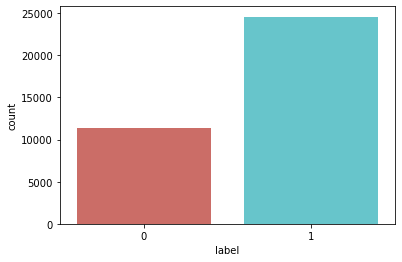

In [74]:
check_dist(combined_liar_fnn)

In [77]:
import string
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a function to preprocess text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    
    return text

# Preprocess the text data
combined_liar_fnn['statement'] = combined_liar_fnn['statement'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\littl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\littl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to numerical features
#vectorizer = TfidfVectorizer()
X_sparse = vectorizer.fit_transform(combined_liar_fnn['statement'])
#X = vectorizer.fit_transform(combined_liar_fnn['statement']).toarray()


# Convert the sparse matrix to a dense array in chunks
chunk_size = 1000
n_samples = X_sparse.shape[0]
n_features = X_sparse.shape[1]
X = np.zeros((n_samples, n_features))

for i in range(0, n_samples, chunk_size):
    X[i:i+chunk_size, :] = X_sparse[i:i+chunk_size, :].toarray()



## PreProcessing Part is done here. 

## The next cells is only for understanding the vectorized new data, but can be deleted in the end. 

In [104]:
#vocab = vectorizer.get_feature_names_out()
vocab = vectorizer.get_feature_names()

# Define the target variable
y = np.array([1 if label in [1] else 0 for label in combined_liar_fnn['label']])


print(X.shape)
j= 0
for i in X[0]:
    if i != 0: print(i, j, vocab[j])
    j =j+1
combined_liar_fnn['statement'][0]

(35987, 10000)
0.3647315298103628 1269 border
0.4006423398961784 1430 building
0.4227473573880462 5362 literally
0.3224499148542543 8946 take
0.46788487161214115 9530 usmexico
0.38144079249850943 9683 wall
0.2436268039670808 9955 years


0    building wall usmexico border take literally y...
0    says annies list political group supports thir...
0                           less americans working 70s
0      miley cyrus liam hemsworth secretly get married
0    teen mom star jenelle evans wedding dress avai...
0    breaking first nfl team declares bankruptcy kn...
0             national federation independent business
Name: statement, dtype: object

## Example how pre-processed data could be used

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
split = int(0.8 * len(combined_liar_fnn))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

# Train the Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Compute the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.864962489580439
Precision: 0.9499844672258465
Recall: 0.9039314218149571
F1-score: 0.9263859436534383


In [106]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [107]:
# Define a new statement
new_statement1 = ['Hillary buys russian lamps.']
new_statement2 = ['Trump builds a wall']
new_statement3 = ['Covid is back.']

# Preprocess the text data
new_statement = [preprocess_text(statement) for statement in new_statement1]

# Convert the text data to numerical features
new_features = vectorizer.transform(new_statement).toarray()

# Make a prediction using the trained model
prediction = lr.predict(new_features)[0]
print(prediction)

if prediction == 1:
    print('This statement is deceptive.')
else:
    print('This statement is truthful.')

1
This statement is deceptive.
